In [9]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [5]:
len(train_data)

8982

In [6]:
len(test_data)

2246

In [7]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in 
                             train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [10]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [11]:
train_labels[10]

3

In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [27]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [19]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 25ms/step - loss: 2.5610 - accuracy: 0.4949 - val_loss: 1.7046 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.3997 - accuracy: 0.7073 - val_loss: 1.2815 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0275 - accuracy: 0.7801 - val_loss: 1.1180 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8153 - accuracy: 0.8272 - val_loss: 1.0089 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6460 - accuracy: 0.8675 - val_loss: 0.9695 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5178 - accuracy: 0.8954 - val_loss: 0.9148 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4137 - accuracy: 0.9183 - val_loss: 0.8900 - val_accuracy: 0.8060
Epoch 8/20
16

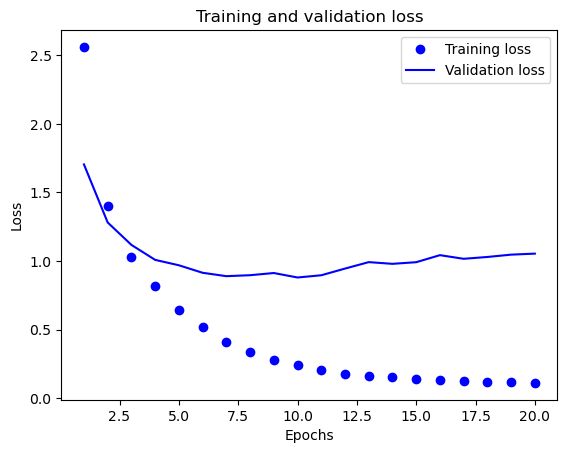

In [22]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

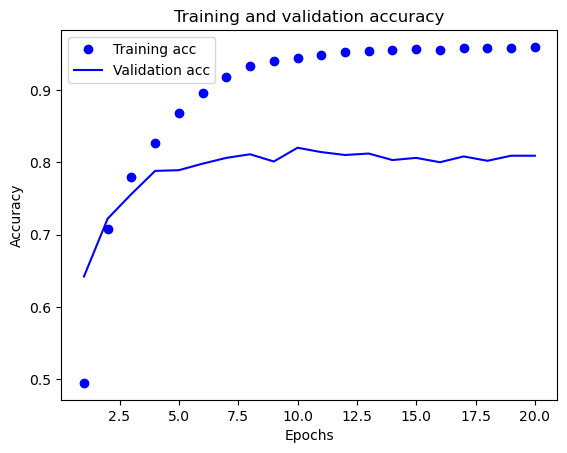

In [24]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 23ms/step - loss: 2.6473 - accuracy: 0.5252 - val_loss: 1.7634 - val_accuracy: 0.6470
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.4297 - accuracy: 0.7051 - val_loss: 1.3394 - val_accuracy: 0.6950
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.0568 - accuracy: 0.7774 - val_loss: 1.1535 - val_accuracy: 0.7460
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8253 - accuracy: 0.8284 - val_loss: 1.0171 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6522 - accuracy: 0.8647 - val_loss: 0.9688 - val_accuracy: 0.7920
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5176 - accuracy: 0.8948 - val_loss: 0.9064 - val_accuracy: 0.8130
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 0.4119 - accuracy: 0.9134 - val_loss: 0.9045 - val_accuracy: 0.8010
Epoch 8/9
16/16 [===

In [29]:
results

[1.004987359046936, 0.784060537815094]

In [30]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.17764915405164738

In [31]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 1ms/step


In [32]:
predictions[0].shape

(46,)

In [33]:
np.sum(predictions[0])

1.0

In [34]:
np.argmax(predictions[0])

3

In [35]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [36]:
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 2.8045 - accuracy: 0.3524 - val_loss: 2.2450 - val_accuracy: 0.3770
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 1.8336 - accuracy: 0.5272 - val_loss: 1.6182 - val_accuracy: 0.6180
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.3710 - accuracy: 0.6496 - val_loss: 1.4118 - val_accuracy: 0.6380
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1760 - accuracy: 0.6778 - val_loss: 1.3542 - val_accuracy: 0.6470
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0508 - accuracy: 0.7152 - val_loss: 1.3162 - val_accuracy: 0.6940
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.9563 - accuracy: 0.7508 - val_loss: 1.3072 - val_accuracy: 0.6940
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.8778 - accuracy: 0.7675 - val_loss: 1.3548 - val_accuracy: 0.6920
Epoch 8/20
63/63 [=

In [43]:
#32개의 유닛을 이용
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 20ms/step - loss: 3.0565 - accuracy: 0.2174 - val_loss: 2.4222 - val_accuracy: 0.4700
Epoch 2/9
16/16 [==============================] - 0s 12ms/step - loss: 2.0260 - accuracy: 0.5891 - val_loss: 1.7348 - val_accuracy: 0.6500
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 1.4726 - accuracy: 0.6986 - val_loss: 1.4059 - val_accuracy: 0.6880
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 1.1764 - accuracy: 0.7443 - val_loss: 1.2411 - val_accuracy: 0.7280
Epoch 5/9
16/16 [==============================] - 0s 12ms/step - loss: 0.9805 - accuracy: 0.7856 - val_loss: 1.1205 - val_accuracy: 0.7590
Epoch 6/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8391 - accuracy: 0.8185 - val_loss: 1.0654 - val_accuracy: 0.7730
Epoch 7/9
16/16 [==============================] - 0s 12ms/step - loss: 0.7283 - accuracy: 0.8415 - val_loss: 1.0170 - val_accuracy: 0.7850
Epoch 8/9
16/16 [===

In [42]:
#128개의 유닛을 이용
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 29ms/step - loss: 2.1932 - accuracy: 0.5634 - val_loss: 1.3704 - val_accuracy: 0.6910
Epoch 2/9
16/16 [==============================] - 0s 22ms/step - loss: 1.1011 - accuracy: 0.7577 - val_loss: 1.0970 - val_accuracy: 0.7540
Epoch 3/9
16/16 [==============================] - 0s 22ms/step - loss: 0.7662 - accuracy: 0.8350 - val_loss: 0.9609 - val_accuracy: 0.7980
Epoch 4/9
16/16 [==============================] - 0s 22ms/step - loss: 0.5425 - accuracy: 0.8903 - val_loss: 0.8781 - val_accuracy: 0.8110
Epoch 5/9
16/16 [==============================] - 0s 21ms/step - loss: 0.4014 - accuracy: 0.9161 - val_loss: 0.8612 - val_accuracy: 0.8150
Epoch 6/9
16/16 [==============================] - 0s 22ms/step - loss: 0.3011 - accuracy: 0.9351 - val_loss: 0.9117 - val_accuracy: 0.8120
Epoch 7/9
16/16 [==============================] - 0s 25ms/step - loss: 0.2498 - accuracy: 0.9431 - val_loss: 0.8919 - val_accuracy: 0.8200
Epoch 8/9
16/16 [===

In [44]:
#1개의 은닉 층 이용
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 56ms/step - loss: 2.6153 - accuracy: 0.5847 - val_loss: 1.8495 - val_accuracy: 0.6760
Epoch 2/9
16/16 [==============================] - 0s 19ms/step - loss: 1.4800 - accuracy: 0.7306 - val_loss: 1.3498 - val_accuracy: 0.7310
Epoch 3/9
16/16 [==============================] - 0s 19ms/step - loss: 1.0704 - accuracy: 0.7879 - val_loss: 1.1356 - val_accuracy: 0.7690
Epoch 4/9
16/16 [==============================] - 0s 19ms/step - loss: 0.8304 - accuracy: 0.8312 - val_loss: 1.0258 - val_accuracy: 0.7880
Epoch 5/9
16/16 [==============================] - 0s 19ms/step - loss: 0.6687 - accuracy: 0.8663 - val_loss: 0.9430 - val_accuracy: 0.8100
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.5470 - accuracy: 0.8924 - val_loss: 0.8937 - val_accuracy: 0.8220
Epoch 7/9
16/16 [==============================] - 0s 19ms/step - loss: 0.4504 - accuracy: 0.9093 - val_loss: 0.8658 - val_accuracy: 0.8250
Epoch 8/9
16/16 [===

In [45]:
#3개의 은닉 층 이용
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 25ms/step - loss: 2.6892 - accuracy: 0.5084 - val_loss: 1.7411 - val_accuracy: 0.6280
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.4284 - accuracy: 0.6996 - val_loss: 1.3118 - val_accuracy: 0.7160
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 1.0676 - accuracy: 0.7616 - val_loss: 1.1375 - val_accuracy: 0.7410
Epoch 4/9
16/16 [==============================] - 0s 22ms/step - loss: 0.8374 - accuracy: 0.8122 - val_loss: 1.0449 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 0s 22ms/step - loss: 0.6692 - accuracy: 0.8533 - val_loss: 1.0181 - val_accuracy: 0.7740
Epoch 6/9
16/16 [==============================] - 0s 19ms/step - loss: 0.5260 - accuracy: 0.8845 - val_loss: 1.0159 - val_accuracy: 0.7730
Epoch 7/9
16/16 [==============================] - 0s 19ms/step - loss: 0.4278 - accuracy: 0.9069 - val_loss: 1.0404 - val_accuracy: 0.7740
Epoch 8/9
16/16 [===